# Aula 10 - EDA com Pacotes Pandas e Seaborn

# Disciplina: Ciência de Dados (DCA-0131)
Prof. Luiz Affonso Guedes

### Departamento de Engenharia de Computação e Automação - DCA

UFRN - 2025

*OBS: Favor fazer cópia do notebook antes de alterá-lo.

### Objetivos:
- Uso do Pacote Seaborn para o processo de EDA.
- Uso de soluções sobre o Padas paar agilizar e ou automatizar o processo de EDA.

### Pacote Seborn:
O pacote Seaborn fornece uma API no topo do Matplotlib que oferece opções para o estilo de gráficos e os padrões de cores, define funções simples de alto nível para tipos de plots de dados estatísticos e integra-se com a funcionalidade fornecida pela Pandas DataFrames.

Assim, o pacote Seaborn é de grande utilidade na etapa de Analise Exploratória de Dados (EDA - Exploratory Data Analysis), uma vez que se pode gerar várias análises estatísticas de forma gráfica sem se ater aos detalhes de implementação dos algoritmos estatísticos.

Alguns links de referência sobre o Seaborn:
- https://seaborn.pydata.org/
- https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
- https://minerandodados.com.br/tutorial-completo-de-como-trabalhar-com-a-biblioteca-seaborn/

### Pacotes Para Automatizar o Processo de EDA:
Atualmente há várias ferramentas desenvolvidas sobre o pacote Pandas para automatizar e ou facilitar o prcesso de EDA. A seguir são listados links para algumas das mais utilizadas:
- https://analyticsindiamag.com/tips-for-automating-eda-using-pandas-profiling-sweetviz-and-autoviz-in-python/
- Pacote Pandas Profiling- https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html
- Pacote Sweetviz- https://pypi.org/project/sweetviz/
- Pacote Autoviz - https://autoviz.io/
- QuickDA - https://analyticsindiamag.com/hands-on-tutorial-on-quickda-for-data-analysis-and-cleaning/

## 1. Revisão de uso do MatPlotLib

A seguir são apresentados alguns exemplo de de uso do pacote MatPlotLib, que é base do pacote Seaborn.

In [14]:
# Importação dos pacotes matplotlib, numpy e pandas.
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [15]:
# Criação de dados randômicos
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

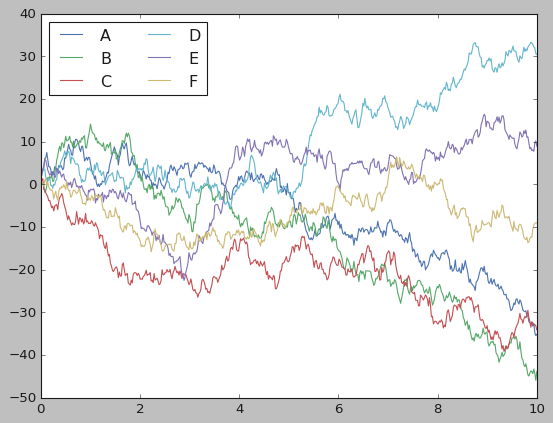

In [16]:
# Plot dos dados com o pacote Matplotlib
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [17]:
# Importação e configuração para o padrão Seaborn
import seaborn as sns
sns.set()

São os mesmos gráficos do exemplo anterior, mas num estilo de cores do Seaborn



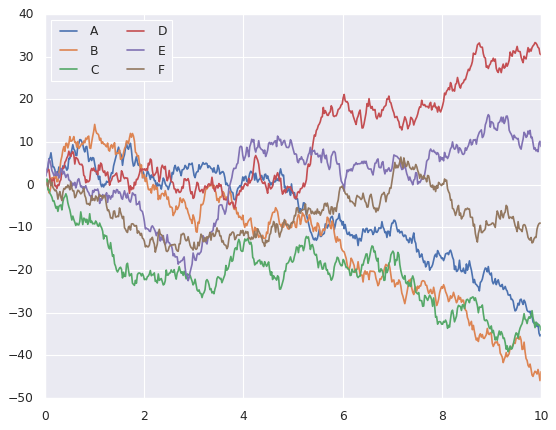

In [18]:
# Mesmo programa do exemplo anterior, porém com Seaborn
print("São os mesmos gráficos do exemplo anterior, mas num estilo de cores do Seaborn\n")
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## 2. Plots com Seaborn
A principal idéia do Seaborn é que ele fornece comandos de alto nível para criar uma variedade de tipos de gráficos úteis para a exploração de dados estatísticos e até mesmo alguns gráficos que envolvem modelagem estatística de forma implícita, como regressão, probabilidades condicionais e análise de correlações.

Observe que tudo o que pode ser feito usando comandos Matplotlib também pode ser realizado com os do Seaborn, mas o inverso não é verdadeiro. Pois, para se gerar alguns resultados oferecidos pelas funcionalidades desse pacote seria necessário utilizar funcionalidades do pacote Numpy (e ou SciPy) para a parte de modelagem estatística e depois se utilizar as funcionalidades do MatPlotLib para visualizar os resultados. Assim, a API do Seaborn fornece funcionalidades em alto nível e mais convenientes para se gerar análises estaísticas sofisticados.

A seguir serão apresentadas algumas funcionalidades básicas no Seaborn.

### 2.1.  Gráficos de Histogramas, KDE e Densidades

Muitas vezes, na visualização de dados estatísticos, tudo o que você quer é traçar histogramas e distribuições conjuntas de variáveis. Vimos que isso é relativamente direto no Matplotlib.

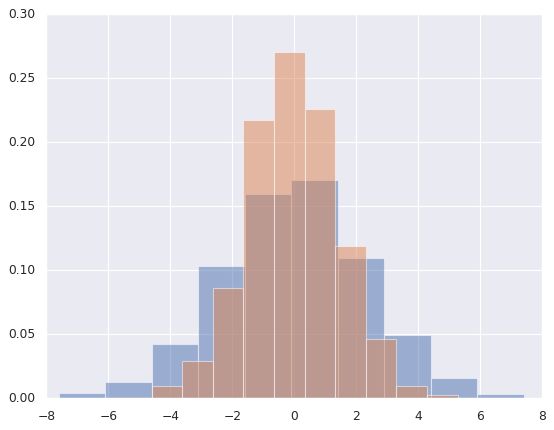

In [19]:
# Exemplo de histogramas
# plt.style.use('classic')   # para se utilizar o padrão clássico de visualização do MatPlotLib
# sns.set()                  # para se utilizar o padrão visual do Seaborn
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)   # geração de números seguindo uma distribuição Normal bidimencional
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

KDE é uma técnica de interpolação de curvas 
- a partir de histogramas (que são discretos) se obtém curvas de densidades de probabilidades (FDP) contínuas.


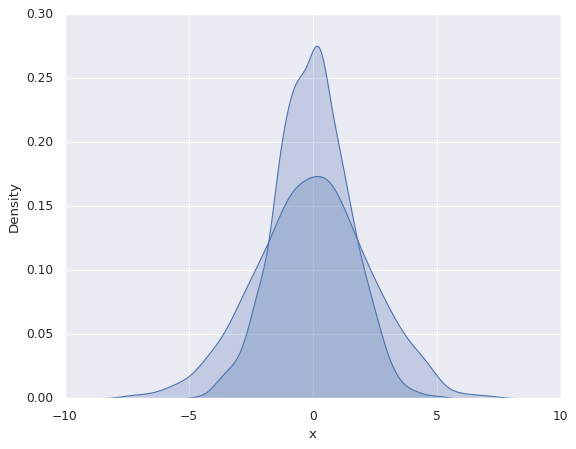

In [20]:
# Suavização de curva com Seaborn
# Usando estimação de densidade de kernel - kernel density estimation (KDE)

print("KDE é uma técnica de interpolação de curvas \n- a partir de histogramas (que são discretos) se obtém curvas de densidades de probabilidades (FDP) contínuas.")
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

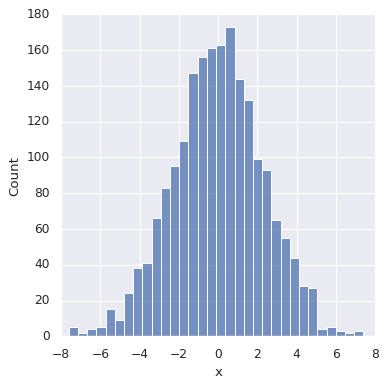

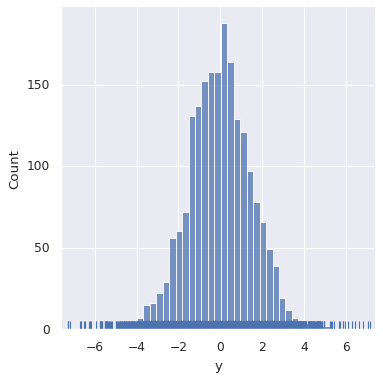

In [21]:
# Combinando histograma com KDE
sns.displot(data['x'])
sns.displot(data['y'])
sns.rugplot(data['x']);

<Axes: xlabel='x', ylabel='Count'>

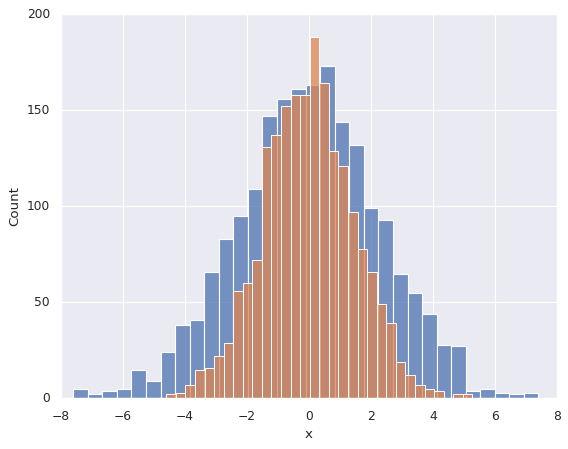

In [22]:
sns.histplot(data, x='x')
sns.histplot(data, x='y')

<Axes: xlabel='x'>

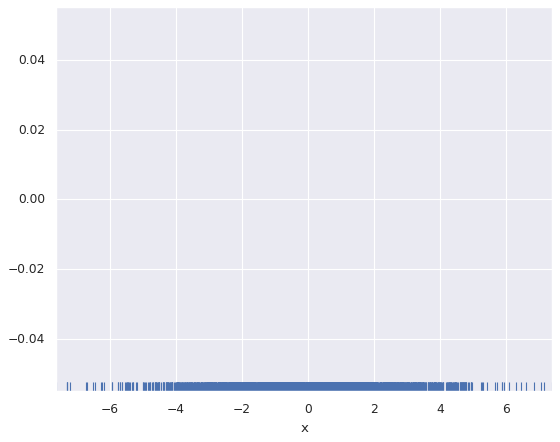

In [23]:
sns.rugplot(data['x'])
#sns.rugplot(data['y']);

<Axes: ylabel='Density'>

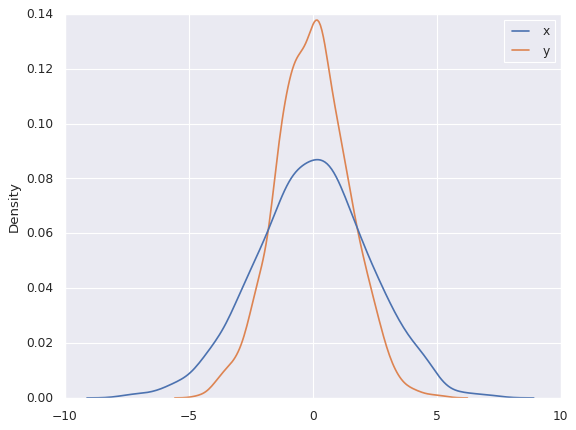

In [24]:
# Se for passado um dataset bi-dimensional para o método kdeplot(),
# será visualizada a curva de superfícies do gráfico.

sns.kdeplot(data)


### Exemplo de aplicação com sns.kdeplot()
Visualizar as distribuição do dataset Iris (do próprio pacote Seaborn)

In [25]:
# Carregando o dataset Iris
iris_df = sns.load_dataset("iris")
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0, 0.5, 'Densidade de Probabilidade')

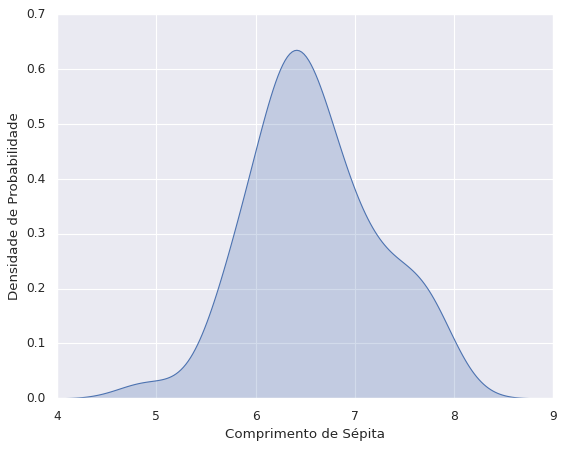

In [26]:
sns.kdeplot(iris_df.loc[(iris_df['species']=='virginica'),'sepal_length'], color='b', fill=True)

# Colocando os labels X and Y
plt.xlabel('Comprimento de Sépita')
plt.ylabel('Densidade de Probabilidade')

Text(0, 0.5, 'Densidade de Probabilidade')

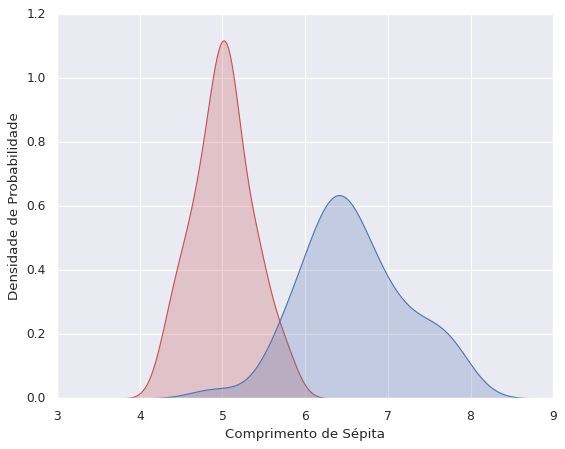

In [27]:
# Traçando duas KDE num mesmo Plot
sns.kdeplot(iris_df.loc[(iris_df['species']=='setosa'),'sepal_length'], color='r', fill=True)

sns.kdeplot(iris_df.loc[(iris_df['species']=='virginica'),
            'sepal_length'], color='b', fill=True)

plt.xlabel('Comprimento de Sépita')
plt.ylabel('Densidade de Probabilidade')

/home/rapha/Venvs/dca3501/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'Label'
  cset = contour_func(


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

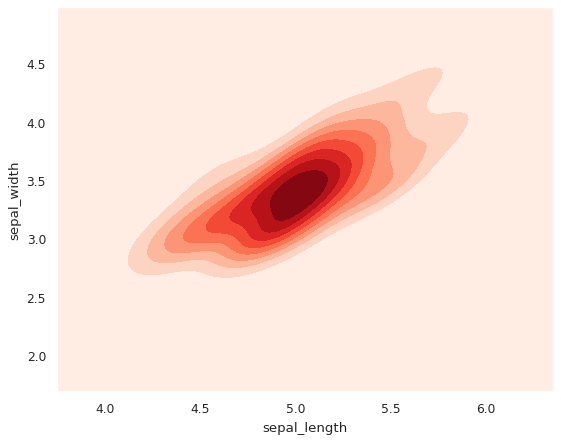

In [28]:
# Configurando as amostras por colunas
iris_setosa = iris_df.query("species =='setosa'")
iris_virginica = iris_df.query("species=='virginica'")

# Traçando o gráfico da curva de nível da FDP obtida via KDE para Iris do tipo Setosa
sns.kdeplot(x=iris_setosa['sepal_length'],
            y=iris_setosa['sepal_width'],
            color='r', fill=True, Label='Iris_Setosa',
            cmap="Reds", thresh=False)

/home/rapha/Venvs/dca3501/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'Label'
  cset = contour_func(
/home/rapha/Venvs/dca3501/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'Label'
  cset = contour_func(


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

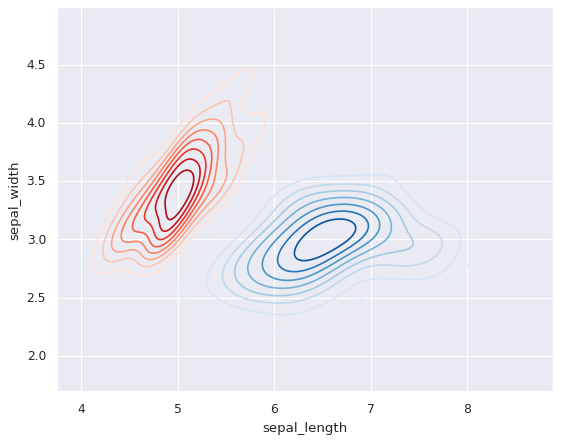

In [29]:
# Traçando duas curvas de níveis obtidas via KDE num mesmo  gráfico
sns.kdeplot(x=iris_setosa['sepal_length'],
            y=iris_setosa['sepal_width'],
            color='r', fill=False, Label='Iris_Setosa',
            cmap="Reds",
            thresh=False # Changed thresh to False to avoid automatic level calculation
            )

sns.kdeplot(x=iris_virginica['sepal_length'],
            y=iris_virginica['sepal_width'], color='b',
            fill=False, Label='Iris_Virginica',
            cmap="Blues", thresh=False)

### 2.2. Distribuições Conjuntas
 Podemos ver a distribuição conjunta e as distribuições marginais em conjunto usando o método sns.jointplot( ). Para esse plot, definiremos o estilo em um fundo branco.

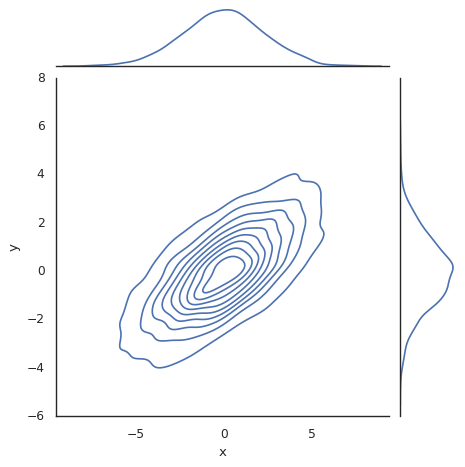

In [30]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='kde');

Existem outros parâmetros que podem ser passados para o método joinplot(), por exemplo, podemos usar um histograma hexagonal em vez disso.


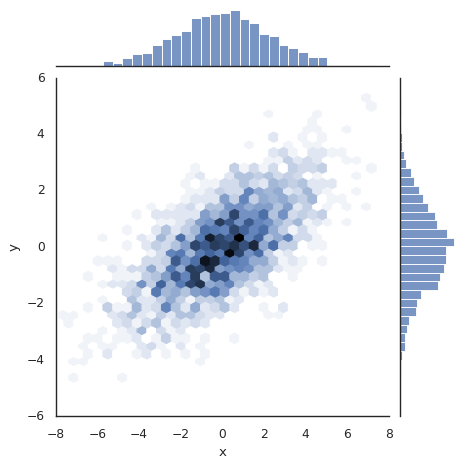

In [31]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, kind='hex')

###2.3. Plots aos Pares e Correlações

Quando se usa conjuntos de dados de dimensões maiores que 02, há a necessidade se utilizar vários gráficos de pares de variáveis. Isso é muito útil para explorar correlações entre dados multidimensionais, quando você deseja traçar todos os pares de valores uns contra os outros.

Vamos demonstrar isso com o bem conhecido conjunto de dados Iris, que lista medidas de pétalas e sépalas de três espécies de íris.

In [32]:
# Exemplo utilizando novamente o dataset Iris
iris = sns.load_dataset("iris")
type(iris)

pandas.core.frame.DataFrame

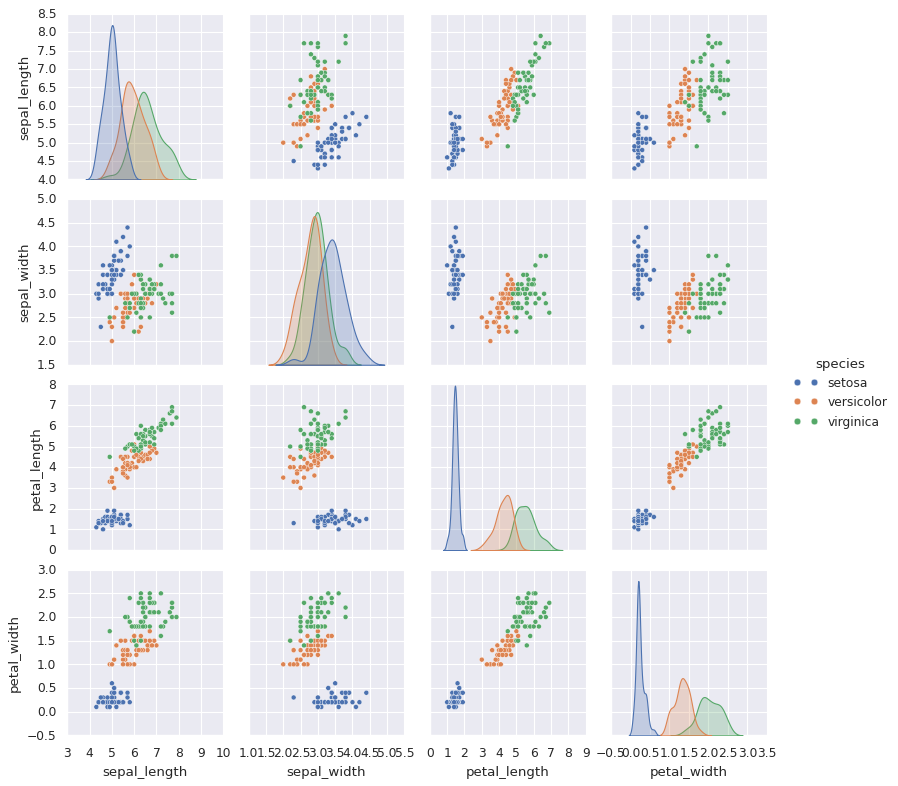

In [33]:
# Para visualizar as relações multidimensionais entre as amostras
# aos pares basta utilizar o método sns.pairplot()

sns.pairplot(iris, hue='species', height=2.5);

### Plot da Matriz de Correlação
- Para isto se utiliza a função heatmap()

In [34]:
# cálculo da matriz de correlação

matriz_correlacao = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
matriz_correlacao.head()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

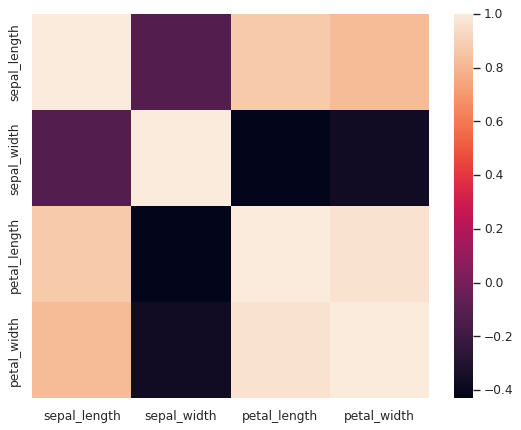

In [35]:
# plot do Gráfico de heatmap da matriz de correlação
sns.heatmap(matriz_correlacao)

###2.4. Histogramas com facetas

Às vezes, a melhor maneira de ver dados é através de histogramas de subconjuntos. O FacetGrid de Seaborn torna isso extremamente simples. Vamos dar uma olhada em alguns dados que mostram o valor que a equipe do restaurante recebe em gorgeta com base em vários dados de indicadores.

In [36]:
# Exemplo com o dataset 'tips'
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


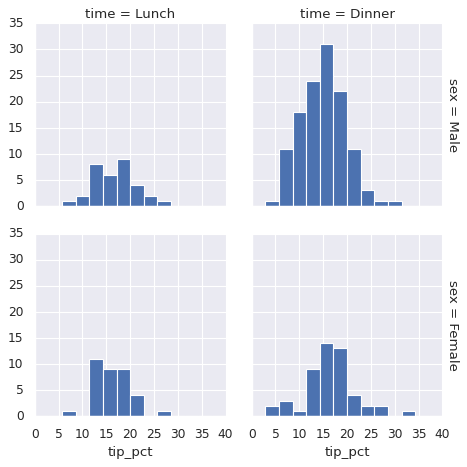

In [37]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

- Quem geralmente dá melhores gorgetas, mulheres ou homens?
- O valor da conta tem relação com o valor da gorgeta?

###2.5. Plots de fatores

Os gráficos de fatores (factorplot) também podem ser úteis para esse tipo de visualização. Isso permite que você visualize a distribuição de um parâmetro dentro dos compartimentos definidos por qualquer outro parâmetro.
- Generalização do boxplot - é apenas uma das opções.



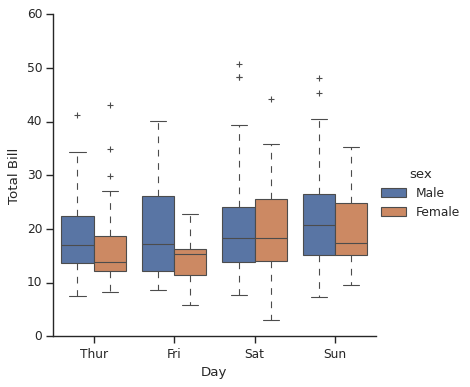

In [38]:
# Exemplo de BoxPlot
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");
    plt.show()

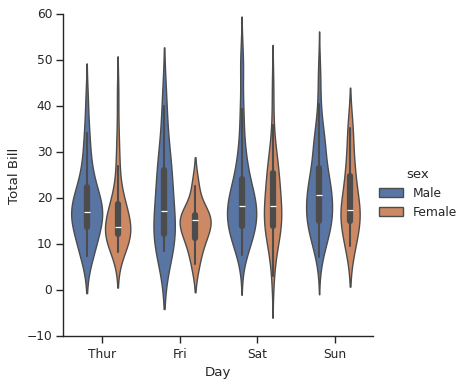

In [39]:
# Exemplo de Violino
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="violin")
    g.set_axis_labels("Day", "Total Bill");
    plt.show()

###2.6. Distribuições conjuntas

Semelhante ao parplot que vimos anteriormente, podemos usar sns.jointplot para mostrar a distribuição conjunta entre conjuntos de dados diferentes, juntamente com as distribuições marginais associadas.

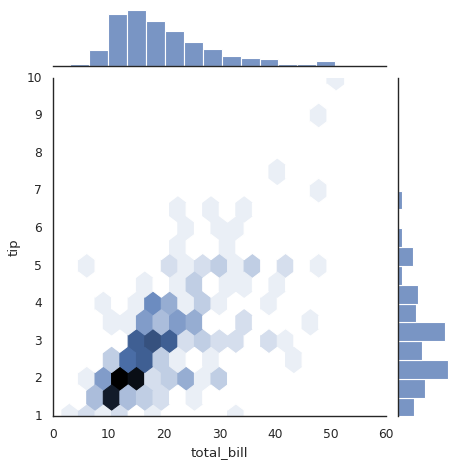

In [40]:
# Exemplo de uso do jointplot - distribuição conjunta
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

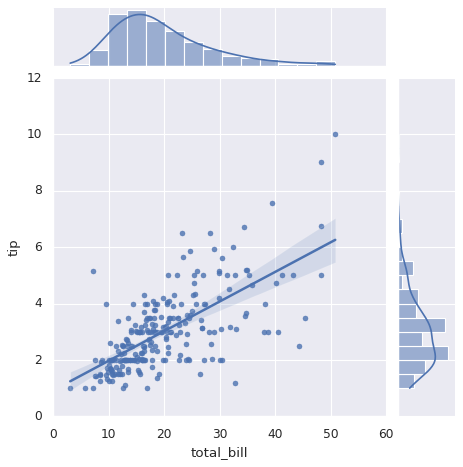

In [41]:
# O plot pode ser usar o KDE e regessão
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

###2.7. Plots de Barras
Sérias temporais podem ser plotadas usando-se o método sns.factorplot().

In [42]:
# Exemplo como o dataset Planets
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


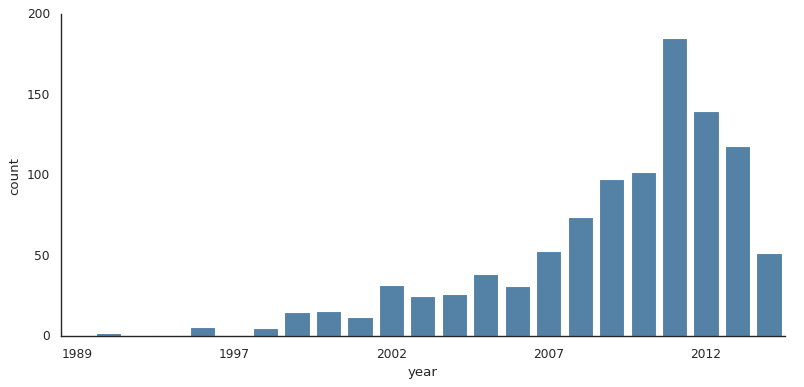

In [43]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

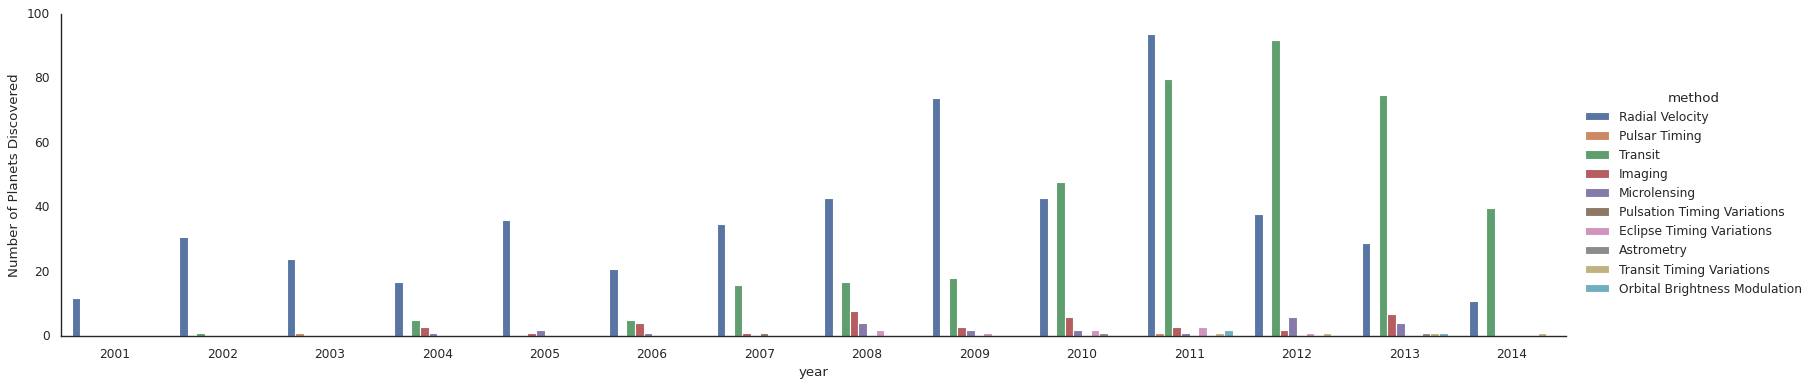

In [44]:
# Exemplo - método utilizado para descoberta dos planetas entre 2001 e 2015
with sns.axes_style('white'):
    g = sns.catplot(x= "year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

###2.8.Gráfico Q-Q
 - Gráfico quantil-quantil ou qq-plot, porposto por Wilk & Gnanadesikan (1968), é um dispositivo gráfico exploratório utilizado para verificar a validade de um pressuposto de distribuição para um conjunto de dados. Em geral, a ideia básica é a de calcular o valor teoricamente esperado para cada ponto de dados (eixo ) com base na distribuição em questão (eixo x). Se os dados de fato seguirem a distribuição assumida os pontos deste gráfico formarão aproximadamente uma linha reta. Pode-se verificar com este gráfico qualquer densidade contínua, eventualmente pode ser utilizado também para funções de probabilidade. O qq-plot vai apresentar-se como uma linha reta se a densidade
assumida estiver correta. Para o caso particular de verificarmos se a densidade é normal, nesta situação o gráfico qq-plot é chamada de qq-norm.

- Podemos utilizar o conceito do para gerarmos gráficos Q-Q via funçòes do Numpy e MatPlotLib ou usarmos funções de alto nível do Scipy.

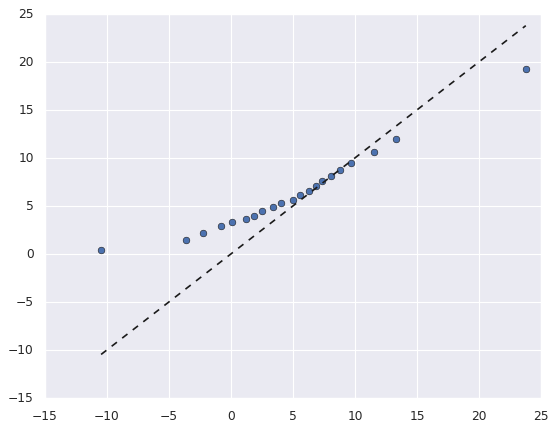

In [45]:
# Gerando o gráfico Q-Q a partir do seu conceito com Numpy e MatPlotLib

import numpy as np
import matplotlib.pyplot as plt

a = np.random.normal(5,5,500)
b = np.random.rayleigh(5,500)

percs = np.linspace(0,100,21)
qn_a = np.percentile(a, percs)
qn_b = np.percentile(b, percs)

plt.plot(qn_a,qn_b, ls="", marker="o")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()

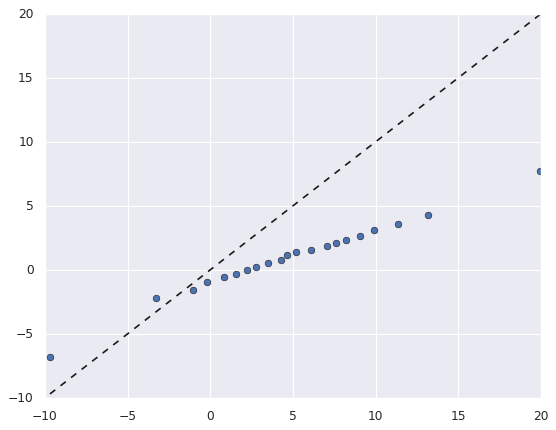

In [46]:
# Gerando o gráfico Q-Q a partir do seu conceito com Numpy e MatPlotLib

import numpy as np
import matplotlib.pyplot as plt

a = np.random.normal(5,5,500) # comparação entre duas distribuições Normais.
b = np.random.normal(1,2,500)

percs = np.linspace(0,100,21)
qn_a = np.percentile(a, percs)
qn_b = np.percentile(b, percs)

plt.plot(qn_a,qn_b, ls="", marker="o")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")

plt.show()

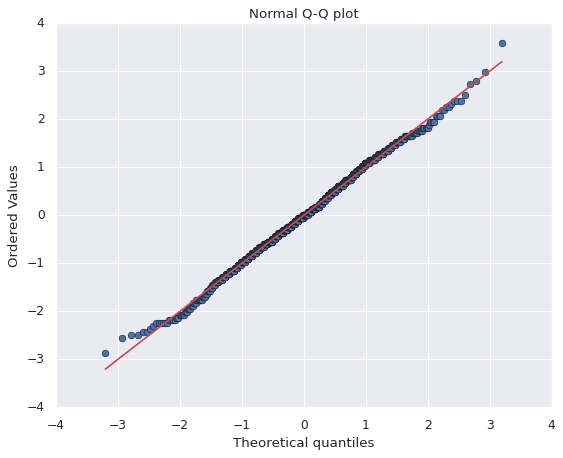

In [47]:
# Gerando Gráfico Q-Q via funcionalidade do SciPy.

import scipy.stats as stats

N = 1200
p = 0.53
q = 1000
obs = np.random.binomial(N, p, size = q)/N

import scipy.stats as stats

z = (obs-np.mean(obs))/np.std(obs)

stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()


###2.9. Exemplo de EDA: Calculando o tempo para completar uma maratona
- Analisar e visualizar os dados.
- Obter os dados da Internet

In [48]:
data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')
data.to_csv("arquivo.csv")  # salvar DataFrame como arquivo .csv
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [49]:
# Vendo o tipo dos dados:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

As colunas de tempo (split, final) foram carregadas como objetos string.
Precisamos converter essas colunas em tipo dataTime.

In [50]:
data['split_dataTime'] = pd.to_datetime(data['split'])
data['final_dataTime'] = pd.to_datetime(data['final'])


/tmp/ipykernel_1817/477460149.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['split_dataTime'] = pd.to_datetime(data['split'])
/tmp/ipykernel_1817/477460149.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['final_dataTime'] = pd.to_datetime(data['final'])


In [51]:
data.dtypes

age                        int64
gender                    object
split                     object
final                     object
split_dataTime    datetime64[ns]
final_dataTime    datetime64[ns]
dtype: object

In [52]:
data.head()

,age,gender,split,final,split_dataTime,final_dataTime
0,33,M,01:05:38,02:08:51,2025-05-13 01:05:38,2025-05-13 02:08:51
1,32,M,01:06:26,02:09:28,2025-05-13 01:06:26,2025-05-13 02:09:28
2,31,M,01:06:49,02:10:42,2025-05-13 01:06:49,2025-05-13 02:10:42
3,38,M,01:06:16,02:13:45,2025-05-13 01:06:16,2025-05-13 02:13:45
4,31,M,01:06:32,02:13:59,2025-05-13 01:06:32,2025-05-13 02:13:59


A seguir são realizados os procedimentos para conveter os tipos String para Tipo times.

In [53]:
# Função para tranformar String em tipo Time
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.datetools.timedelta(hours=h, minutes=m, seconds=s)

In [54]:
# Função para tranformar Tipo Array de Strings em formato de Time para Array de inteiros correspondendo a segundos
def convert_time2(s1):
  valores = []
  for val in s1:
    h, m, s = map(int, val.split(':'))
    tempo = 3600*h + 60 *m + 1* s
    valores.append(int(tempo))
  return valores

In [55]:
data1 = pd.read_csv('arquivo.csv')
data1.head()

,Unnamed: 0,age,gender,split,final
0,0,33,M,01:05:38,02:08:51
1,1,32,M,01:06:26,02:09:28
2,2,31,M,01:06:49,02:10:42
3,3,38,M,01:06:16,02:13:45
4,4,31,M,01:06:32,02:13:59


In [56]:
data1.dtypes

Unnamed: 0     int64
age            int64
gender        object
split         object
final         object
dtype: object

In [57]:
data1['split'].head()


0    01:05:38
1    01:06:26
2    01:06:49
3    01:06:16
4    01:06:32
Name: split, dtype: object

In [58]:
#Verificando o tipo do dado
type(data1['split'])

pandas.core.series.Series

In [59]:
# Obtendo os tempo de split e final em segundo
data1['split_sec'] = convert_time2(data1['split'])
data1['final_sec'] = convert_time2(data1['final'])
data1.head()

,Unnamed: 0,age,gender,split,final,split_sec,final_sec
0,0,33,M,01:05:38,02:08:51,3938,7731
1,1,32,M,01:06:26,02:09:28,3986,7768
2,2,31,M,01:06:49,02:10:42,4009,7842
3,3,38,M,01:06:16,02:13:45,3976,8025
4,4,31,M,01:06:32,02:13:59,3992,8039


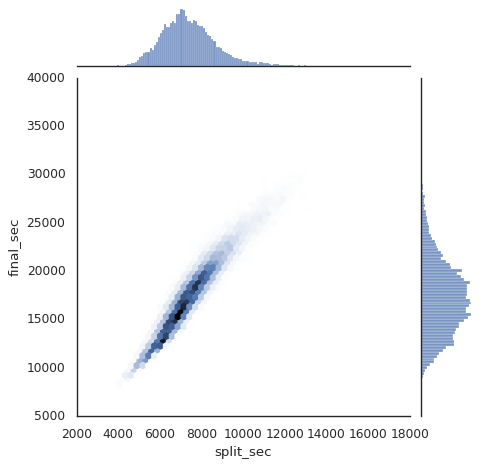

In [60]:
# Usando o método joitplot()

with sns.axes_style('white'):
    sns.jointplot(data1, x="split_sec", y="final_sec", kind='hex')


In [61]:
# Inclusão de mais uma coluna Split_frac
# que mede o grau em que cada corredor
# correu mais rápido a segunda metade da maratona em relação à primeira

data1['split_frac'] = 1 - 2 * data1['split_sec'] / data1['final_sec']
data1.head()

,Unnamed: 0,age,gender,split,final,split_sec,final_sec,split_frac
0,0,33,M,01:05:38,02:08:51,3938,7731,-0.018756
1,1,32,M,01:06:26,02:09:28,3986,7768,-0.026262
2,2,31,M,01:06:49,02:10:42,4009,7842,-0.022443
3,3,38,M,01:06:16,02:13:45,3976,8025,0.009097
4,4,31,M,01:06:32,02:13:59,3992,8039,0.006842


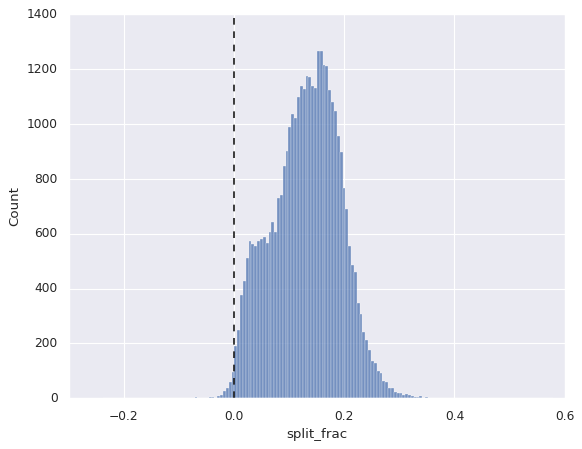

In [62]:
# Explique o significado do gráfico a seguir

#sns.distplot(data1['split_frac'], kde=False); # distplot está sendo descontinuado
sns.histplot(data1['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [63]:
# calcule a quantidade de corredores
# que foram mais rápidos na segunda metade da maratona



In [64]:
# Qual foi o tempo e o sexo do ganhador?
# Ele/ela correu mais rápido a primeira ou segunda metade da maratona?



Verificação se há correlação entre a 'split_frac' e outras variáveis. Vamos fazer isso usando o método ParGrid(), que plota parcelas de todas essas correlações.

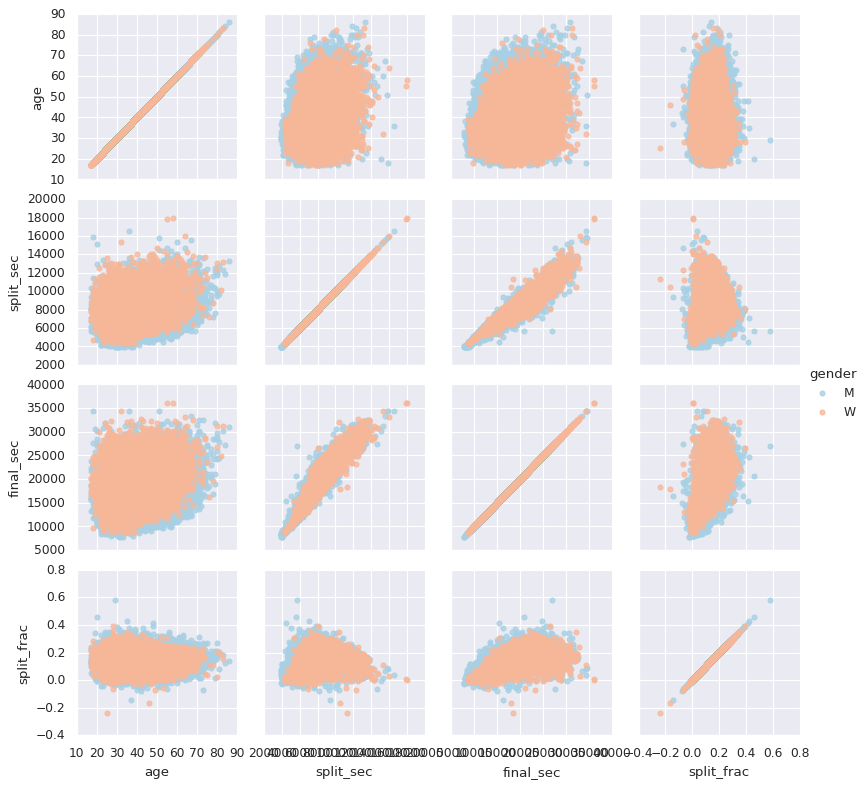

In [65]:
# Uso do método PairGrid - correlação aos pares

g = sns.PairGrid(data1, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [66]:
# cálculo da matriz de correlação
#matriz_correlacao = data1.corr()  # código antigo
matriz_correlacao = data1[['age', 'split_sec', 'final_sec', 'split_frac']].corr()
matriz_correlacao.head()



,age,split_sec,final_sec,split_frac
age,1.000000,0.163177,0.145993,0.040700
split_sec,0.163177,1.000000,0.955577,0.429223
final_sec,0.145993,0.955577,1.000000,0.668295
split_frac,0.040700,0.429223,0.668295,1.000000


<Axes: >

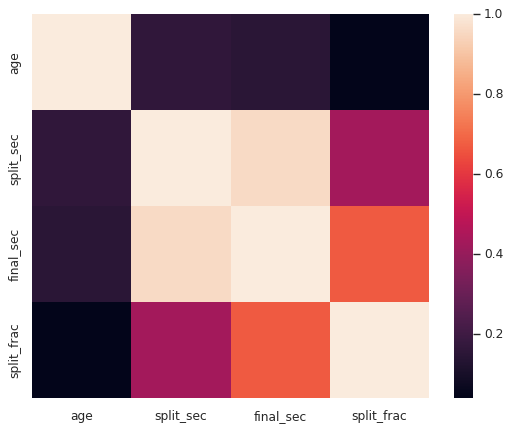

In [67]:
# plot do Gráfico de heatmap da matriz de correlação
sns.heatmap(matriz_correlacao)

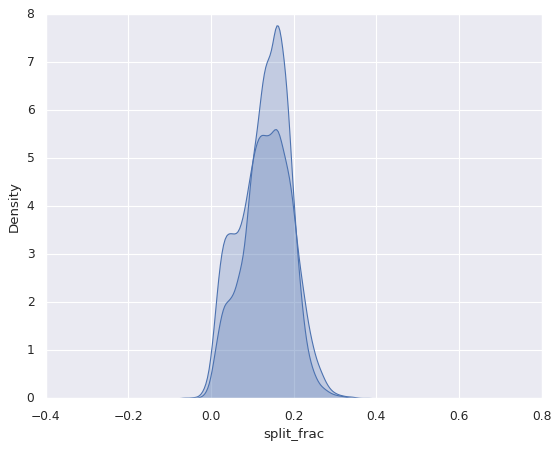

In [68]:
# Análise da split_frac em função do sexo do corredor(a)
sns.kdeplot(data1.split_frac[data1.gender=='M'], label='men', fill=True)
sns.kdeplot(data1.split_frac[data1.gender=='W'], label='women', fill=True)
plt.xlabel('split_frac');

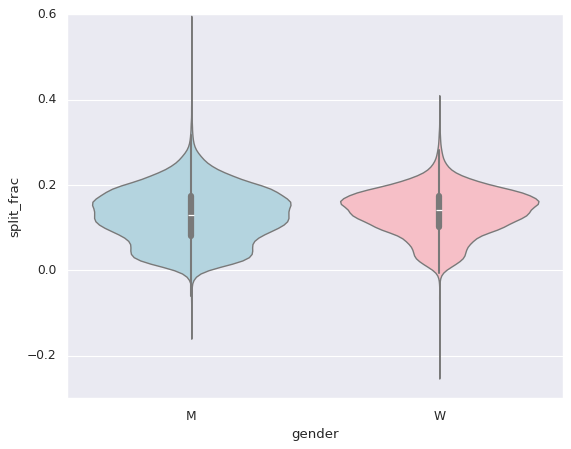

In [69]:
# Gráfico de violino - bom para distribuições bimodais
sns.violinplot(x="gender", y="split_frac", hue= "gender", data=data1,
               palette=["lightblue", "lightpink"]);

Para analisar mais em detalhes, podemos compare estes gráficos de violino em função da idade. Para isto, ccriaremos uma nova coluna na matriz que especifica a década de idade em que cada pessoa possui.

In [70]:
# Inclusão da coluna de idade em décadas dos corredores
data1['age_dec'] = data1.age.map(lambda age: 10 * (age // 10))
data1.head()

,Unnamed: 0,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,0,33,M,01:05:38,02:08:51,3938,7731,-0.018756,30
1,1,32,M,01:06:26,02:09:28,3986,7768,-0.026262,30
2,2,31,M,01:06:49,02:10:42,4009,7842,-0.022443,30
3,3,38,M,01:06:16,02:13:45,3976,8025,0.009097,30
4,4,31,M,01:06:32,02:13:59,3992,8039,0.006842,30


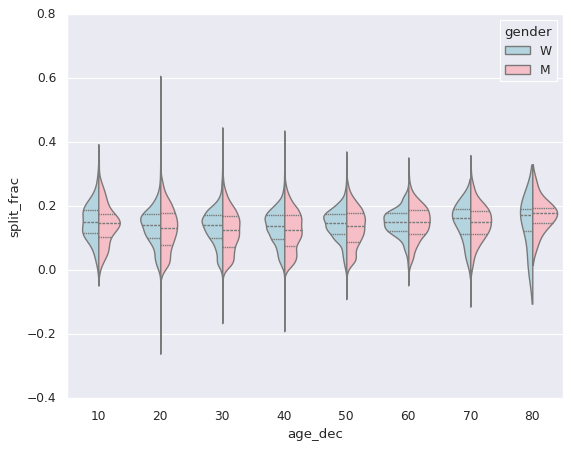

In [71]:
men = (data1.gender == 'M')
women = (data1.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data1,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

In [72]:
# Há quantos corredores do sexo masculino com 80 anos ou mais?
# Qual é a faixa de idade que há mais corredores homens?



In [73]:
# Há quantas corredoras entre 30 e 40 anos?
# Qual é a faixa de idade que há mais corredoras?



De volta aos homens com 'split_frac' negativas: quem são esses corredores? A 'split_frac' se correlaciona com o final rápido da prova?
Podemos traçar um gráfico com esta informação usando o método lmplot(), que irá aplicar uma regressão linear aos dados.

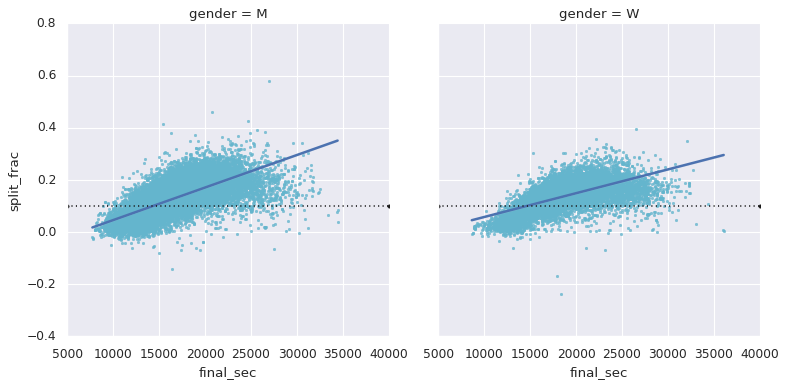

In [74]:
# Uso do método lmplot() - método aplica uma regressão linear aos dados

g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data1,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");


Podemos dizer que os corredores mais rápidos tendem a acelerar no final da prova?

In [75]:
# Escreva um programa para mostrar isto.


### 2.10 - Pacotes para Automatizar o Processo de EDA
Para facilitar o processo de EDA, já há disponível diversos pacotes em Python que automatizam a geração de gráficos diretamente de um dataframe Pandas.
Dentre alguns desses pacotes, descacam-se:
- Pandas Profiling
- Sweetviz
- Autoviz
- CkickDA




In [76]:
# Carregando um Dataset Pandas
# O dataset do pacote seaborn está em formato DataFrame-Pandas

import pandas as pd

import seaborn as sns
# import seaborn.apionly as sns
sns.get_dataset_names()
df = sns.load_dataset('car_crashes')
#df = sns.load_dataset('titanic')
df.head(7)



,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT


In [77]:
# Instalando o Pandas Profiling
#!pip install pandas-profiling==2.7.1
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 17.9 MB 797.1 kB/s 0:00:23m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 405.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00ta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 731.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 818.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 770.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 752.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.2/687.2 kB 813.8 kB

In [78]:
# Gerando um Relatório no Pandas Profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile
# design_report.to_file(output_file='report.html') # gerando um arquivo do relatório em html

ModuleNotFoundError: No module named 'pkg_resources'